# Task 2: Classification and PCA on mobile robot sensory data

In [1]:
import pandas as pd
import numpy as np

Download the data from here:

https://www.kaggle.com/competitions/career-con-2019/data

You only need the original training set, use it for both training and testing.  (The X_test wasn't published.)

In [2]:
# import data gathered during robot navigation over different surfaces
path = "../Task2/"
dfX = pd.read_csv(path + "X_train.csv") # making dataframe of training data from file
dfy = pd.read_csv(path + "y_train.csv") # making dataframe of training labels from file

# preparing the feature space
data = dfX.to_numpy()  # convert data frame into numpy bidimensional array
data = data[:, 3:]  # remove first 3 columns of identifiers
X = np.reshape(data,(int(data.shape[0]/128), 10*128)) # reshape so that 128 timestamps for the same trial are tiled into a single row

# preparing the labels vector
surfaces = dfy['surface']  # list of labels in strings
types = list(set(surfaces))  # set of unique labels
y = [types.index(s) for s in surfaces]  # numerical list of labels

Task 2

A. change the network structure (number of layers and neurons), and parameters (transfer functions, learning rate, algorithms, stop conditions): how does classification accuracy change? What about training time?

B. apply PCA on the dataset, varying the number of dimensions you keep. Perform classification on the reduced datasets. How does accuracy change with different dimensions? What does that tell you about the original dataset?

Perform systematic tests on appropriate values and ranges and report your results, answering the questions.

# Your submission below

TASK2-A

In [3]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {len(y)}")
print(f"X: ,{X}")
print(f"y: , {y}")

Shape of X: (3810, 1280)
Shape of y: 3810
X: ,[[-0.75853 -0.63435 -0.10488 ... -0.53426 0.80346 -10.697]
 [-0.95896 0.24074 0.030758 ... 0.0066244 2.073 -9.7037]
 [-0.50944 -0.84779 -0.12946 ... -1.6762 3.0324 -8.2569]
 ...
 [-0.39188 0.90642 0.14264 ... -4.0438 -1.4637 -10.302]
 [-0.27113 0.95067 0.14298 ... 2.7992 6.6526 -8.3813]
 [0.6295 -0.7682 -0.083734 ... 0.82391 4.2751 -10.498]]
y: , [8, 3, 3, 3, 5, 0, 7, 3, 2, 0, 7, 0, 1, 1, 3, 1, 1, 5, 0, 5, 0, 2, 5, 0, 5, 5, 8, 4, 0, 2, 5, 5, 8, 3, 3, 3, 0, 1, 7, 6, 8, 6, 8, 6, 5, 4, 7, 8, 3, 7, 3, 5, 5, 3, 1, 5, 8, 8, 1, 5, 3, 0, 7, 2, 7, 3, 0, 0, 3, 7, 3, 3, 7, 7, 6, 8, 5, 8, 7, 8, 5, 0, 7, 6, 8, 5, 3, 7, 5, 6, 7, 7, 8, 8, 3, 5, 6, 6, 2, 0, 8, 5, 6, 7, 8, 7, 5, 5, 7, 7, 6, 8, 7, 3, 5, 7, 7, 5, 1, 2, 0, 5, 7, 7, 2, 3, 0, 0, 1, 5, 7, 7, 8, 7, 5, 5, 5, 5, 6, 3, 5, 0, 2, 7, 3, 5, 0, 6, 4, 1, 5, 3, 3, 2, 7, 8, 5, 3, 7, 5, 0, 8, 3, 7, 6, 2, 7, 8, 8, 8, 0, 0, 6, 3, 0, 2, 1, 6, 7, 2, 5, 0, 3, 2, 7, 2, 7, 0, 1, 4, 8, 5, 6, 7, 8, 3, 5, 6, 3, 3, 0, 7

## Split the data into train and test sets:

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Importing necessary libraries and define hyperparameters:


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time

# Define hyperparameters
hidden_layer_sizes = (200, 100, 50)
activation = 'relu'
solver = 'adam'
learning_rate = 0.001
max_iter = 1000


## Initializing the MLP classifier with partial fit and fit it once to initialize classes:


In [6]:
# Initialize the MLP classifier with partial fit
clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation,
                    solver=solver, learning_rate_init=learning_rate, max_iter=max_iter)

# Fit the classifier once to initialize classes
clf.partial_fit(X_train, y_train, np.unique(y_train))


MLPClassifier(hidden_layer_sizes=(200, 100, 50), max_iter=1000)

## Training and evaluation loop, and collecting results:


In [8]:
# Define hyperparameters
hidden_layer_sizes = (200, 100, 50)
activation = 'relu'
solver = 'adam'
learning_rate = 0.001
max_iter = 1000

# Initialize lists to store accuracies and times
accuracies = []
times = []

# Training and evaluation loop
start_time = time.time()
for i in range(max_iter):
    clf.partial_fit(X_train, y_train)
    train_accuracy = clf.score(X_train, y_train)
    accuracies.append(train_accuracy)
    elapsed_time = time.time() - start_time
    times.append(elapsed_time)
    
    # Print accuracy and time each time they are updated
    print(f"Iteration {i + 1} - Training Accuracy: {train_accuracy:.3f}, Elapsed Time: {elapsed_time:.3f} seconds")
    
    # Check if training accuracy reaches the desired threshold
    if train_accuracy >= 0.99:
        print(f"Training accuracy reached 0.99. Stopping training.")
        break

# Get final training time and accuracy
training_time = times[-1]
final_accuracy = accuracies[-1]

# Print final results
print(f"\nFinal Training Time: {training_time:.3f} seconds")
print(f"Final Training Accuracy: {final_accuracy:.3f}")



Iteration 1 - Training Accuracy: 0.343, Elapsed Time: 0.705 seconds
Iteration 2 - Training Accuracy: 0.391, Elapsed Time: 1.525 seconds
Iteration 3 - Training Accuracy: 0.423, Elapsed Time: 2.195 seconds
Iteration 4 - Training Accuracy: 0.455, Elapsed Time: 2.924 seconds
Iteration 5 - Training Accuracy: 0.467, Elapsed Time: 3.640 seconds
Iteration 6 - Training Accuracy: 0.493, Elapsed Time: 4.369 seconds
Iteration 7 - Training Accuracy: 0.519, Elapsed Time: 5.093 seconds
Iteration 8 - Training Accuracy: 0.517, Elapsed Time: 5.843 seconds
Iteration 9 - Training Accuracy: 0.546, Elapsed Time: 6.556 seconds
Iteration 10 - Training Accuracy: 0.490, Elapsed Time: 7.261 seconds
Iteration 11 - Training Accuracy: 0.564, Elapsed Time: 7.979 seconds
Iteration 12 - Training Accuracy: 0.606, Elapsed Time: 8.696 seconds
Iteration 13 - Training Accuracy: 0.628, Elapsed Time: 9.485 seconds
Iteration 14 - Training Accuracy: 0.624, Elapsed Time: 10.194 seconds
Iteration 15 - Training Accuracy: 0.662, E

## Print final results and plot accuracy over training time:


Hidden layers: (200, 100, 50), Activation: relu, Solver: adam, Learning rate: 0.001, Max iter: 1000, Training Time: 87.593 seconds, Final Accuracy: 0.990


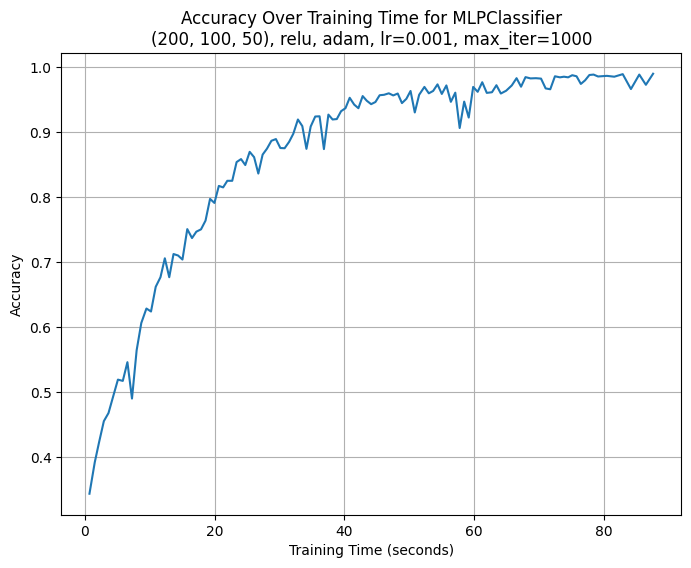

In [9]:
# Print final results
print(f"Hidden layers: {hidden_layer_sizes}, Activation: {activation}, Solver: {solver}, "
      f"Learning rate: {learning_rate}, Max iter: {max_iter}, Training Time: {training_time:.3f} seconds, "
      f"Final Accuracy: {final_accuracy:.3f}")

# Plot accuracy over training time
plt.figure(figsize=(8, 6))
plt.plot(times, accuracies)
plt.xlabel('Training Time (seconds)')
plt.ylabel('Accuracy')
plt.title(f'Accuracy Over Training Time for MLPClassifier\n{hidden_layer_sizes}, {activation}, {solver}, lr={learning_rate}, max_iter={max_iter}')
plt.grid(True)
plt.show()


## Experiment: Changing Hidden Layer Sizes

Iteration 1 - Training Accuracy: 0.354, Elapsed Time: 1.420 seconds
Iteration 2 - Training Accuracy: 0.369, Elapsed Time: 2.713 seconds
Iteration 3 - Training Accuracy: 0.335, Elapsed Time: 4.089 seconds
Iteration 4 - Training Accuracy: 0.479, Elapsed Time: 5.859 seconds
Iteration 5 - Training Accuracy: 0.517, Elapsed Time: 7.788 seconds
Iteration 6 - Training Accuracy: 0.533, Elapsed Time: 9.815 seconds
Iteration 7 - Training Accuracy: 0.566, Elapsed Time: 11.574 seconds
Iteration 8 - Training Accuracy: 0.580, Elapsed Time: 12.973 seconds
Iteration 9 - Training Accuracy: 0.574, Elapsed Time: 14.645 seconds
Iteration 10 - Training Accuracy: 0.589, Elapsed Time: 15.916 seconds
Iteration 11 - Training Accuracy: 0.639, Elapsed Time: 17.146 seconds
Iteration 12 - Training Accuracy: 0.664, Elapsed Time: 18.416 seconds
Iteration 13 - Training Accuracy: 0.598, Elapsed Time: 19.787 seconds
Iteration 14 - Training Accuracy: 0.694, Elapsed Time: 21.173 seconds
Iteration 15 - Training Accuracy: 0

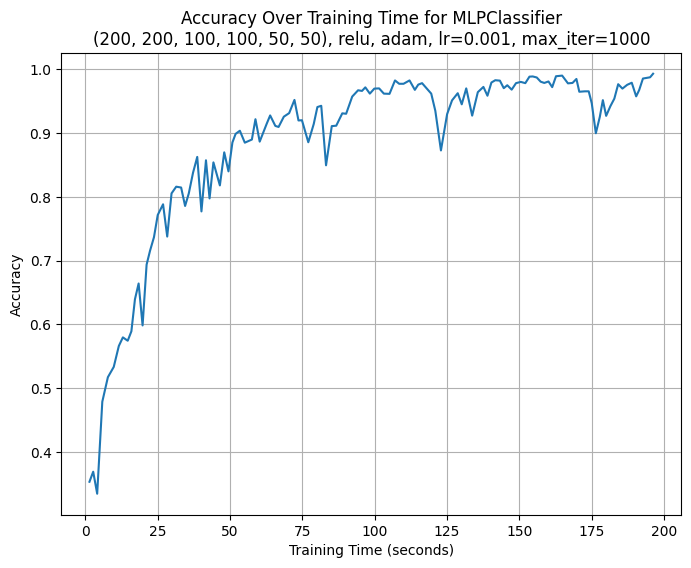

In [10]:
# Define hyperparameters
hidden_layer_sizes = (200, 200, 100, 100, 50, 50)
activation = 'relu'
solver = 'adam'
learning_rate = 0.001
max_iter = 1000

# Initialize lists to store accuracies and times
accuracies = []
times = []

# Initialize MLP classifier
clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation,
solver=solver, learning_rate_init=learning_rate, max_iter=1)
# Fit the classifier once to initialize classes
clf.partial_fit(X_train, y_train, np.unique(y_train))


# Training and evaluation loop
start_time = time.time()
for i in range(max_iter):
    clf.partial_fit(X_train, y_train)
    train_accuracy = clf.score(X_train, y_train)
    accuracies.append(train_accuracy)
    elapsed_time = time.time() - start_time
    times.append(elapsed_time)

    # Print accuracy and time each time they are updated
    print(f"Iteration {i + 1} - Training Accuracy: {train_accuracy:.3f}, Elapsed Time: {elapsed_time:.3f} seconds")

    # Check if training accuracy reaches the desired threshold
    if train_accuracy >= 0.99:
        print(f"Training accuracy reached 0.99. Stopping training.")
        break

# Get final training time and accuracy
training_time = times[-1]
final_accuracy = accuracies[-1]

# Print final results
print(f"\nFinal Training Time: {training_time:.3f} seconds")
print(f"Final Training Accuracy: {final_accuracy:.3f}")

# Plot accuracy over training time
plt.figure(figsize=(8, 6))
plt.plot(times, accuracies)
plt.xlabel('Training Time (seconds)')
plt.ylabel('Accuracy')
plt.title(f'Accuracy Over Training Time for MLPClassifier\n{hidden_layer_sizes}, {activation}, {solver}, lr={learning_rate}, max_iter={max_iter}')
plt.grid(True)
plt.show()




## Experiment: Trying Different Activation Functions


Iteration 1 - Training Accuracy: 0.281, Elapsed Time: 1.062 seconds
Iteration 2 - Training Accuracy: 0.281, Elapsed Time: 2.220 seconds
Iteration 3 - Training Accuracy: 0.251, Elapsed Time: 3.819 seconds
Iteration 4 - Training Accuracy: 0.303, Elapsed Time: 5.095 seconds
Iteration 5 - Training Accuracy: 0.340, Elapsed Time: 6.302 seconds
Iteration 6 - Training Accuracy: 0.305, Elapsed Time: 7.633 seconds
Iteration 7 - Training Accuracy: 0.355, Elapsed Time: 9.236 seconds
Iteration 8 - Training Accuracy: 0.351, Elapsed Time: 10.326 seconds
Iteration 9 - Training Accuracy: 0.303, Elapsed Time: 11.314 seconds
Iteration 10 - Training Accuracy: 0.330, Elapsed Time: 12.214 seconds
Iteration 11 - Training Accuracy: 0.339, Elapsed Time: 13.427 seconds
Iteration 12 - Training Accuracy: 0.355, Elapsed Time: 14.695 seconds
Iteration 13 - Training Accuracy: 0.357, Elapsed Time: 16.652 seconds
Iteration 14 - Training Accuracy: 0.360, Elapsed Time: 18.245 seconds
Iteration 15 - Training Accuracy: 0.

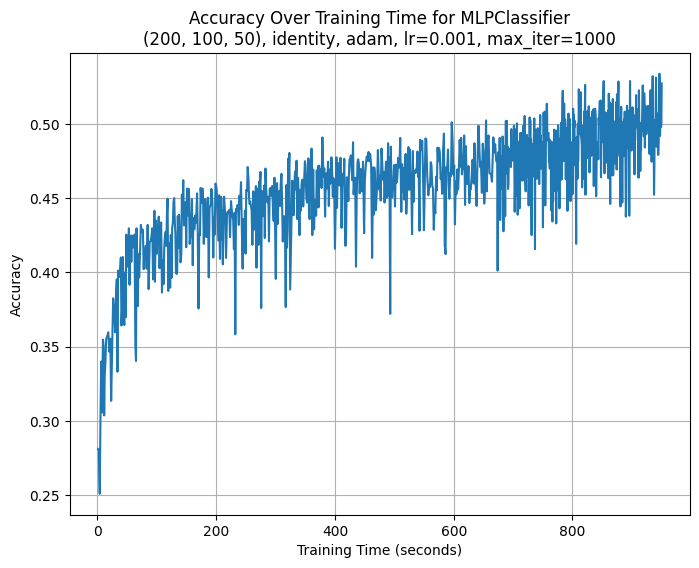

In [11]:
# Define hyperparameters
hidden_layer_sizes = (200, 100, 50)
activation = 'identity'
solver = 'adam'
learning_rate = 0.001
max_iter = 1000

# Initialize lists to store accuracies and times
accuracies = []
times = []

# Initialize MLP classifier
clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation,
solver=solver, learning_rate_init=learning_rate, max_iter=1)
# Fit the classifier once to initialize classes
clf.partial_fit(X_train, y_train, np.unique(y_train))

# Training and evaluation loop
start_time = time.time()
for i in range(max_iter):
    clf.partial_fit(X_train, y_train)
    train_accuracy = clf.score(X_train, y_train)
    accuracies.append(train_accuracy)
    elapsed_time = time.time() - start_time
    times.append(elapsed_time)

    # Print accuracy and time each time they are updated
    print(f"Iteration {i + 1} - Training Accuracy: {train_accuracy:.3f}, Elapsed Time: {elapsed_time:.3f} seconds")

    # Check if training accuracy reaches the desired threshold
    if train_accuracy >= 0.99:
        print(f"Training accuracy reached 0.99. Stopping training.")
        break

# Get final training time and accuracy
training_time = times[-1]
final_accuracy = accuracies[-1]

# Print final results
print(f"\nFinal Training Time: {training_time:.3f} seconds")
print(f"Final Training Accuracy: {final_accuracy:.3f}")

# Plot accuracy over training time
plt.figure(figsize=(8, 6))
plt.plot(times, accuracies)
plt.xlabel('Training Time (seconds)')
plt.ylabel('Accuracy')
plt.title(f'Accuracy Over Training Time for MLPClassifier\n{hidden_layer_sizes}, {activation}, {solver}, lr={learning_rate}, max_iter={max_iter}')
plt.grid(True)
plt.show()




## Experiment: Adjusting Learning Rates


Iteration 1 - Training Accuracy: 0.191, Elapsed Time: 0.568 seconds
Iteration 2 - Training Accuracy: 0.200, Elapsed Time: 1.135 seconds
Iteration 3 - Training Accuracy: 0.246, Elapsed Time: 1.698 seconds
Iteration 4 - Training Accuracy: 0.281, Elapsed Time: 2.260 seconds
Iteration 5 - Training Accuracy: 0.288, Elapsed Time: 2.842 seconds
Iteration 6 - Training Accuracy: 0.283, Elapsed Time: 3.400 seconds
Iteration 7 - Training Accuracy: 0.276, Elapsed Time: 4.002 seconds
Iteration 8 - Training Accuracy: 0.284, Elapsed Time: 4.555 seconds
Iteration 9 - Training Accuracy: 0.265, Elapsed Time: 5.119 seconds
Iteration 10 - Training Accuracy: 0.288, Elapsed Time: 5.677 seconds
Iteration 11 - Training Accuracy: 0.309, Elapsed Time: 6.235 seconds
Iteration 12 - Training Accuracy: 0.306, Elapsed Time: 6.785 seconds
Iteration 13 - Training Accuracy: 0.321, Elapsed Time: 7.384 seconds
Iteration 14 - Training Accuracy: 0.321, Elapsed Time: 7.966 seconds
Iteration 15 - Training Accuracy: 0.310, El

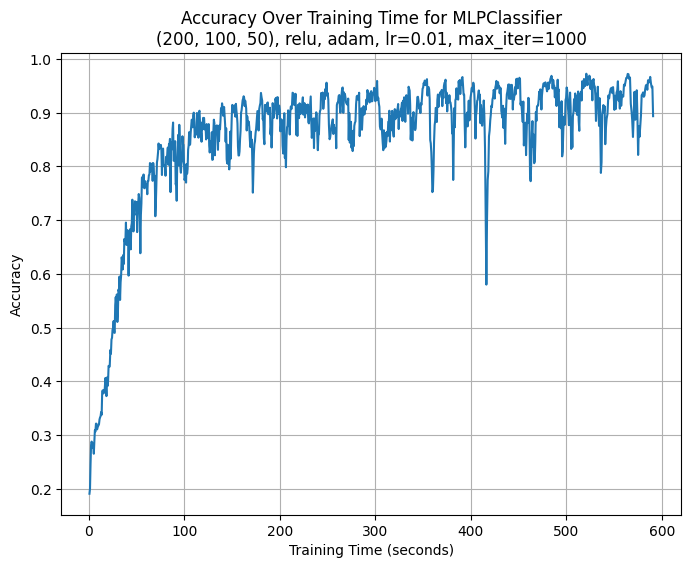

In [12]:
# Define hyperparameters
hidden_layer_sizes = (200, 100, 50)
activation = 'relu'
solver = 'adam'
learning_rate = 0.01
max_iter = 1000

# Initialize lists to store accuracies and times
accuracies = []
times = []

# Initialize MLP classifier
clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation,
solver=solver, learning_rate_init=learning_rate, max_iter=1)
# Fit the classifier once to initialize classes
clf.partial_fit(X_train, y_train, np.unique(y_train))


# Training and evaluation loop
start_time = time.time()
for i in range(max_iter):
    clf.partial_fit(X_train, y_train)
    train_accuracy = clf.score(X_train, y_train)
    accuracies.append(train_accuracy)
    elapsed_time = time.time() - start_time
    times.append(elapsed_time)

    # Print accuracy and time each time they are updated
    print(f"Iteration {i + 1} - Training Accuracy: {train_accuracy:.3f}, Elapsed Time: {elapsed_time:.3f} seconds")

    # Check if training accuracy reaches the desired threshold
    if train_accuracy >= 0.99:
        print(f"Training accuracy reached 0.99. Stopping training.")
        break

# Get final training time and accuracy
training_time = times[-1]
final_accuracy = accuracies[-1]

# Print final results
print(f"\nFinal Training Time: {training_time:.3f} seconds")
print(f"Final Training Accuracy: {final_accuracy:.3f}")

# Plot accuracy over training time
plt.figure(figsize=(8, 6))
plt.plot(times, accuracies)
plt.xlabel('Training Time (seconds)')
plt.ylabel('Accuracy')
plt.title(f'Accuracy Over Training Time for MLPClassifier\n{hidden_layer_sizes}, {activation}, {solver}, lr={learning_rate}, max_iter={max_iter}')
plt.grid(True)
plt.show()


## Experiment: Exploring Different Solvers


Iteration 1 - Training Accuracy: 0.178, Elapsed Time: 0.561 seconds
Iteration 2 - Training Accuracy: 0.236, Elapsed Time: 1.130 seconds
Iteration 3 - Training Accuracy: 0.153, Elapsed Time: 1.669 seconds
Iteration 4 - Training Accuracy: 0.200, Elapsed Time: 2.228 seconds
Iteration 5 - Training Accuracy: 0.282, Elapsed Time: 2.754 seconds
Iteration 6 - Training Accuracy: 0.210, Elapsed Time: 3.279 seconds
Iteration 7 - Training Accuracy: 0.214, Elapsed Time: 3.786 seconds
Iteration 8 - Training Accuracy: 0.250, Elapsed Time: 4.287 seconds
Iteration 9 - Training Accuracy: 0.288, Elapsed Time: 4.797 seconds
Iteration 10 - Training Accuracy: 0.298, Elapsed Time: 5.303 seconds
Iteration 11 - Training Accuracy: 0.219, Elapsed Time: 5.816 seconds
Iteration 12 - Training Accuracy: 0.255, Elapsed Time: 6.316 seconds
Iteration 13 - Training Accuracy: 0.251, Elapsed Time: 6.842 seconds
Iteration 14 - Training Accuracy: 0.302, Elapsed Time: 7.345 seconds
Iteration 15 - Training Accuracy: 0.323, El

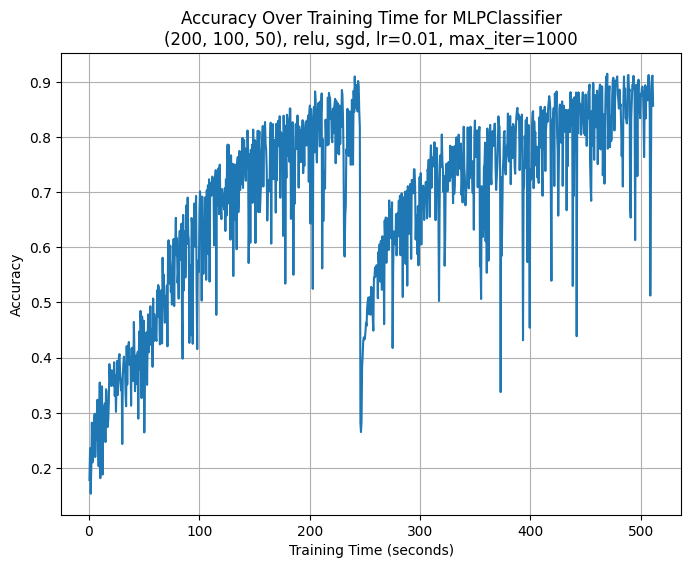

In [19]:
# Define hyperparameters
hidden_layer_sizes = (200, 100, 50)
activation = 'relu'
solver = 'sgd'
learning_rate = 0.001
max_iter = 1000

# Initialize lists to store accuracies and times
accuracies = []
times = []

# Initialize MLP classifier
clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation,
solver=solver, learning_rate_init=learning_rate, max_iter=1)
# Fit the classifier once to initialize classes
clf.partial_fit(X_train, y_train, np.unique(y_train))


# Training and evaluation loop
start_time = time.time()
for i in range(max_iter):
    clf.partial_fit(X_train, y_train)
    train_accuracy = clf.score(X_train, y_train)
    accuracies.append(train_accuracy)
    elapsed_time = time.time() - start_time
    times.append(elapsed_time)

    # Print accuracy and time each time they are updated
    print(f"Iteration {i + 1} - Training Accuracy: {train_accuracy:.3f}, Elapsed Time: {elapsed_time:.3f} seconds")

    # Check if training accuracy reaches the desired threshold
    if train_accuracy >= 0.99:
        print(f"Training accuracy reached 0.99. Stopping training.")
        break

# Get final training time and accuracy
training_time = times[-1]
final_accuracy = accuracies[-1]

# Print final results
print(f"\nFinal Training Time: {training_time:.3f} seconds")
print(f"Final Training Accuracy: {final_accuracy:.3f}")

# Plot accuracy over training time
plt.figure(figsize=(8, 6))
plt.plot(times, accuracies)
plt.xlabel('Training Time (seconds)')
plt.ylabel('Accuracy')
plt.title(f'Accuracy Over Training Time for MLPClassifier\n{hidden_layer_sizes}, {activation}, {solver}, lr={learning_rate}, max_iter={max_iter}')
plt.grid(True)
plt.show()


## Experiment: Varying Max Iterations


Iteration 1 - Training Accuracy: 0.215, Elapsed Time: 0.650 seconds
Iteration 2 - Training Accuracy: 0.222, Elapsed Time: 1.284 seconds
Iteration 3 - Training Accuracy: 0.281, Elapsed Time: 1.901 seconds
Iteration 4 - Training Accuracy: 0.269, Elapsed Time: 2.472 seconds
Iteration 5 - Training Accuracy: 0.299, Elapsed Time: 3.047 seconds
Iteration 6 - Training Accuracy: 0.327, Elapsed Time: 3.622 seconds
Iteration 7 - Training Accuracy: 0.326, Elapsed Time: 4.187 seconds
Iteration 8 - Training Accuracy: 0.330, Elapsed Time: 4.781 seconds
Iteration 9 - Training Accuracy: 0.312, Elapsed Time: 5.345 seconds
Iteration 10 - Training Accuracy: 0.350, Elapsed Time: 5.911 seconds
Iteration 11 - Training Accuracy: 0.332, Elapsed Time: 6.481 seconds
Iteration 12 - Training Accuracy: 0.352, Elapsed Time: 7.036 seconds
Iteration 13 - Training Accuracy: 0.368, Elapsed Time: 7.612 seconds
Iteration 14 - Training Accuracy: 0.370, Elapsed Time: 8.204 seconds
Iteration 15 - Training Accuracy: 0.383, El

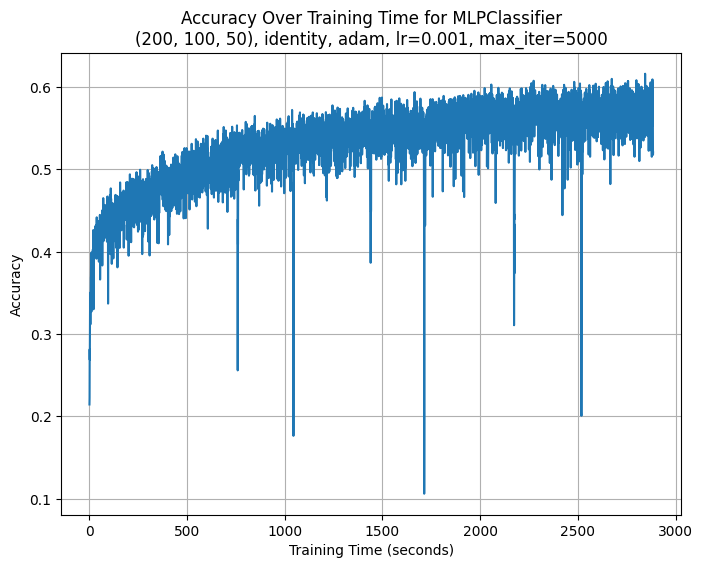

In [24]:
# Define hyperparameters
hidden_layer_sizes = (200, 100, 50)
activation = 'identity'
solver = 'adam'
learning_rate = 0.001
max_iter = 5000

# Initialize lists to store accuracies and times
accuracies = []
times = []

# Initialize MLP classifier
clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation,
solver=solver, learning_rate_init=learning_rate, max_iter=1)
# Fit the classifier once to initialize classes
clf.partial_fit(X_train, y_train, np.unique(y_train))


# Training and evaluation loop
start_time = time.time()
for i in range(max_iter):
    clf.partial_fit(X_train, y_train)
    train_accuracy = clf.score(X_train, y_train)
    accuracies.append(train_accuracy)
    elapsed_time = time.time() - start_time
    times.append(elapsed_time)

    # Print accuracy and time each time they are updated
    print(f"Iteration {i + 1} - Training Accuracy: {train_accuracy:.3f}, Elapsed Time: {elapsed_time:.3f} seconds")

    # Check if training accuracy reaches the desired threshold
    if train_accuracy >= 0.99:
        print(f"Training accuracy reached 0.99. Stopping training.")
        break

# Get final training time and accuracy
training_time = times[-1]
final_accuracy = accuracies[-1]

# Print final results
print(f"\nFinal Training Time: {training_time:.3f} seconds")
print(f"Final Training Accuracy: {final_accuracy:.3f}")

# Plot accuracy over training time
plt.figure(figsize=(8, 6))
plt.plot(times, accuracies)
plt.xlabel('Training Time (seconds)')
plt.ylabel('Accuracy')
plt.title(f'Accuracy Over Training Time for MLPClassifier\n{hidden_layer_sizes}, {activation}, {solver}, lr={learning_rate}, max_iter={max_iter}')
plt.grid(True)
plt.show()

# Task B: Apply PCA and perform classification on reduced datasets:



Number of components: 10, Accuracy: 0.327
Number of components: 50, Accuracy: 0.434
Number of components: 90, Accuracy: 0.419
Number of components: 130, Accuracy: 0.451
Number of components: 170, Accuracy: 0.413
Number of components: 210, Accuracy: 0.432
Number of components: 250, Accuracy: 0.388
Number of components: 290, Accuracy: 0.408
Number of components: 330, Accuracy: 0.411
Number of components: 370, Accuracy: 0.390
Number of components: 410, Accuracy: 0.395
Number of components: 450, Accuracy: 0.409
Number of components: 490, Accuracy: 0.399
Number of components: 530, Accuracy: 0.416
Number of components: 570, Accuracy: 0.402
Number of components: 610, Accuracy: 0.438
Number of components: 650, Accuracy: 0.415
Number of components: 690, Accuracy: 0.406
Number of components: 730, Accuracy: 0.419
Number of components: 770, Accuracy: 0.404
Number of components: 810, Accuracy: 0.391
Number of components: 850, Accuracy: 0.382
Number of components: 890, Accuracy: 0.407
Number of comp

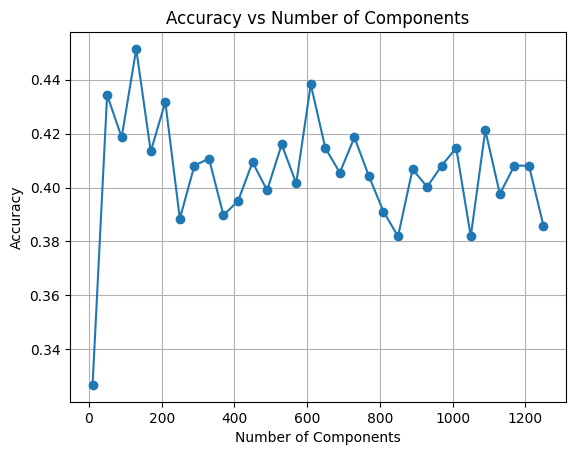

In [7]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load your dataset (X and y)

# Define the range of n_components to try
n_components_range = range(10, X.shape[1], 40)  # Adjust the range as needed

# Define hyperparameters for MLPClassifier
hidden_layer_sizes = (200, 100, 50)
activation = 'relu'
solver = 'adam'
learning_rate = 0.001
max_iter = 1000

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store accuracies
pca_accuracies = []

# Loop over different values of n_components
for n_components in n_components_range:
    # Initialize PCA
    pca = PCA(n_components=n_components)

    # Transform the training and testing data using PCA
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Initialize MLPClassifier
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, max_iter=max_iter)

    # Train the classifier on the PCA-transformed training data
    clf.fit(X_train_pca, y_train)

    # Evaluate the classifier on the PCA-transformed testing data
    y_pred = clf.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)

    # Store the accuracy for the current n_components
    pca_accuracies.append(accuracy)
    print(f"Number of components: {n_components}, Accuracy: {accuracy:.3f}")

# Plot the accuracies
plt.plot(n_components_range, pca_accuracies, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Components')
plt.grid(True)
plt.show()
